# Image classification with Convolutional Neural Networks

In [1]:
!python -V

Python 3.6.5 :: Anaconda, Inc.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

# Import data

In [35]:
import json
import kaggle_imaterialist_furniture
from collections import defaultdict

In [7]:
PATH = "data/imaterialist-challenge-furniture-2018"

In [8]:
# !kaggle competitions download -c 'imaterialist-challenge-furniture-2018' -p {PATH}

In [9]:
!ls {PATH}

sample_submission_randomlabel.csv  train       validation.json
test.json			   train.json


### Train images

In [ ]:
with open(f'{PATH}/train.json') as json_data:
    train_data = json.load(json_data)

In [11]:
train_data.keys()

dict_keys(['images', 'annotations'])

In [67]:
train_img_path = f'{PATH}/train'
os.makedirs(train_img_path, exist_ok=True)

In [14]:
image_labels = {}
labels = set()
for img in train_data['annotations']:
    image_labels[img['image_id']] = img['label_id']
    labels.add(img['label_id'])

In [15]:
len(image_labels)

194828

In [16]:
len(labels)

128

In [69]:
!ls {train_img_path}

1    106  113  120  128  2   27  34  41  49  56  63  70  78  85  92
10   107  114  121  13	 20  28  35  42  5   57  64  71  79  86  93
100  108  115  122  14	 21  29  36  43  50  58  65  72  8   87  94
101  109  116  123  15	 22  3	 37  44  51  59  66  73  80  88  95
102  11   117  124  16	 23  30  38  45  52  6	 67  74  81  89  96
103  110  118  125  17	 24  31  39  46  53  60  68  75  82  9	 97
104  111  119  126  18	 25  32  4   47  54  61  69  76  83  90  98
105  112  12   127  19	 26  33  40  48  55  62  7   77  84  91  99


In [70]:
test_count = 5
count = 0
for image in train_data['images']:
    url = image['url'][0]
    id = image['image_id']
    print(url)
    file_path = f'{train_img_path}/{image_labels[id]}/{id}.jpg'
    os.makedirs(f'{train_img_path}/{image_labels[id]}', exist_ok=True)
    if os.path.isfile(file_path):
        print(f'skipping {file_path}')
    else:
        print(f'getting {file_path}')
        kaggle_imaterialist_furniture.save_remote_image(url, file_path)

    count = count + 1
    if count > test_count:
        break

https://img13.360buyimg.com/imgzone/jfs/t2857/351/510705008/279959/4e27dce0/57171f60N523c940e.jpg
getting data/imaterialist-challenge-furniture-2018/train/5/1.jpg
http://www.tengdakeli.cn/350/timg01/uploaded/i1/12034027012625145/T1pFCtFbVcXXXXXXXX_%21%210-item_pic.jpg
getting data/imaterialist-challenge-furniture-2018/train/5/2.jpg
failed to get data/imaterialist-challenge-furniture-2018/train/5/2.jpg
https://img13.360buyimg.com/imgzone/jfs/t8899/250/980951973/79501/43f4f687/59b25f42N52ee2b0c.jpg
getting data/imaterialist-challenge-furniture-2018/train/5/3.jpg
http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855447419.jpg
getting data/imaterialist-challenge-furniture-2018/train/5/4.jpg
http://a.vpimg4.com/upload/merchandise/287883/QQI-390870207-1.jpg
getting data/imaterialist-challenge-furniture-2018/train/5/5.jpg
https://img.alicdn.com/imgextra/TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-item_pic.jpg
getting data/imaterialist-challenge-furniture-2018/train/5/6.jpg


### Validation images

In [26]:
with open(f'{PATH}/validation.json') as json_data:
    validation_data = json.load(json_data)

In [27]:
validation_data.keys()

dict_keys(['images', 'annotations'])

In [73]:
validation_path = f'{PATH}/valid'
os.makedirs(train_img_path, exist_ok=True)

In [29]:
validation_image_labels = {}
validation_labels = set()
for img in validation_data['annotations']:
    validation_image_labels[img['image_id']] = img['label_id']
    validation_labels.add(img['label_id'])

In [30]:
len(validation_image_labels)

6400

In [31]:
len(validation_labels)

128

In [74]:
test_count = 5
count = 0
for image in validation_data['images']:
    url = image['url'][0]
    id = image['image_id']
    print(url)
    file_path = f'{validation_path}/{validation_image_labels[id]}/{id}.jpg'
    os.makedirs(f'{validation_path}/{validation_image_labels[id]}', exist_ok=True)
    if os.path.isfile(file_path):
        print(f'skipping {file_path}')
    else:
        print(f'getting {file_path}')
        kaggle_imaterialist_furniture.save_remote_image(url, file_path)

    count = count + 1
    if count > test_count:
        break

http://www.ghs.net/public/images/fb/3d/51/3bebd41a640b6d3278e781c86ab67d6401a48633.jpg
getting data/imaterialist-challenge-furniture-2018/valid/38/1.jpg
https://img.alicdn.com/imgextra/TB2chFei9YH8KJjSspdXXcRgVXa_!!3085441904.jpg
getting data/imaterialist-challenge-furniture-2018/valid/63/2.jpg
http://static-news.17house.com/web/news/201602/26/201602261523152152.jpg
getting data/imaterialist-challenge-furniture-2018/valid/33/3.jpg
http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNVJuETI19AAAAAAjH3FE605.jpg
getting data/imaterialist-challenge-furniture-2018/valid/126/4.jpg
https://img.alicdn.com/imgextra/T1sLtpFH8aXXXXXXXX_!!0-item_pic.jpg
getting data/imaterialist-challenge-furniture-2018/valid/18/5.jpg
https://img.alicdn.com/imgextra/TB2xKYDhFXXXXXNXpXXXXXXXXXX_!!1581515815.jpg
getting data/imaterialist-challenge-furniture-2018/valid/125/6.jpg


# Look at images

In [37]:
os.listdir(PATH)

['test.json',
 'train.json',
 'validation.json',
 'valid',
 'train',
 'sample_submission_randomlabel.csv']

In [39]:
sorted(os.listdir(f'{PATH}/valid'))

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [41]:
files = os.listdir(f'{PATH}/valid/1')[:5]
files

['426.jpg', '29.jpg', '50.jpg', '103.jpg', '30.jpg']

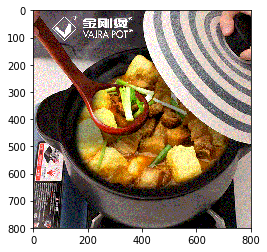

In [54]:
img = plt.imread(f'data/imaterialist-challenge-furniture-2018/train/5/213.jpg')
plt.imshow(img);

In [47]:
img.shape

(666, 1000, 3)

# First model

In [75]:
sz = 224
arch = resnet34
data = ImageClassifierData.from_paths(f'{PATH}/', tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)


100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


epoch      trn_loss   val_loss   accuracy               
    0      4.610339   5.578855   0.0       
    1      5.260495   5.217265   0.0            



[array([5.21726]), 0.0]